# Problem Understanding
The Internet has profoundly changed the way we buy things, but the online shopping of today is likely not the end of that change; after each purchase we still need to wait multiple days for physical goods to be carried to our doorstep. This is where drones come in ­ autonomous, electric vehicles delivering online purchases. Flying, so never stuck in traffic. As drone technology improves every year, there remains a major issue: how do we manage and coordinate all those drones?

## Task
Given a hypothetical fleet of drones, a list of customer orders and availability of the individual products in warehouses, your task is to schedule the drone operations so that the orders are completed as soon as possible. You will need to handle the complications of multiple drones, customer orders, product types and weights, warehouses, and delivery destinations.

In [117]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset

In [2]:
with open('../data/busy_day.in') as file:
    data_list = file.read().splitlines()

In [8]:
print(' Rows of grid,columns of grid,drones,turns, maxpay load in units(u):',data_list[0], 
      '\n Different product types:',data_list[1],
      '\n product types weigh:',data_list[2],
      '\n warehouses:',data_list[3],
      '\n First warehouse location at first warehouse (row, column):',data_list[4],
      '\n Inventory of products:',data_list[5],
      '\n second warehouse location (row, column)  :',data_list[6],
      '\n Inventory of products at second ware house:',data_list[7],
      '\n Number of orders:',data_list[24],
      '\n First order to be delivered to:',data_list[25],
      '\n Number of items in first order:',data_list[26],
      '\n Items of product types:',data_list[27]    )  

 Rows of grid,columns of grid,drones,turns, maxpay load in units(u): 400 600 30 112993 200 
 Different product types: 400 
 product types weigh: 73 40 84 107 52 36 13 74 36 94 93 46 123 24 100 93 62 49 97 102 80 37 22 25 72 48 40 74 32 31 136 64 99 37 44 36 104 74 112 40 65 67 50 143 23 26 91 20 142 128 9 77 40 26 55 104 59 112 42 69 87 89 2 11 105 43 105 23 21 88 57 40 52 63 35 141 54 27 45 37 21 37 102 38 36 117 57 93 24 52 83 133 51 102 34 52 39 54 64 146 127 100 58 50 49 40 55 123 64 30 127 63 19 59 31 22 68 37 107 68 52 61 35 38 76 44 21 144 21 40 105 48 97 70 74 95 75 28 25 40 81 72 58 99 52 5 72 84 53 21 110 97 30 43 92 109 39 89 51 30 102 94 13 45 93 94 90 104 36 55 92 12 45 126 73 132 118 127 125 26 83 69 49 39 4 63 84 47 75 43 82 43 51 28 118 110 42 2 53 74 54 57 92 23 72 95 76 35 38 100 52 34 58 74 86 25 32 61 39 55 76 68 107 82 97 108 57 38 88 71 22 40 63 37 80 51 52 52 67 101 49 46 100 52 63 36 53 45 51 56 71 50 13 29 18 36 87 86 39 11 148 74 74 121 11 28 65 79 32 85 95 26

# Examine data

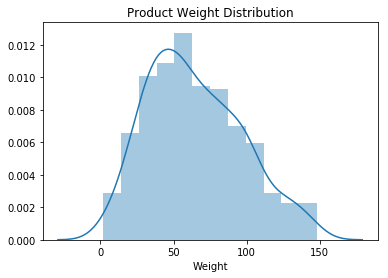

In [71]:
weight = [int(i) for i in data_list[2].split(" ")]
ax = sns.distplot(weight)
ax.set_title('Product Weight Distribution')
ax.set_xlabel("Weight")
plt.show()

In [16]:
warehouse = {}
for i in range(10):
    warehouse[i] = [int(i) for i in data_list[5+2*i].split(" ")]

In [32]:
df = pd.DataFrame(warehouse).T
df = df.add_prefix("prd_")

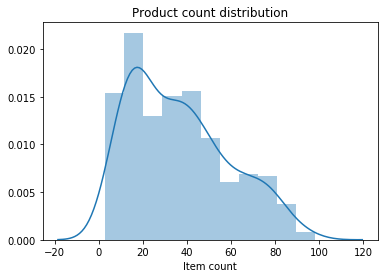

There are on average 36.44 items for each product across all warehouses


In [125]:
ax = sns.distplot(df.sum())
ax.set_title("Product count distribution")
ax.set_xlabel("Item count")
plt.show()
print("There are on average",df.sum().mean(),"items for each product across all warehouses")

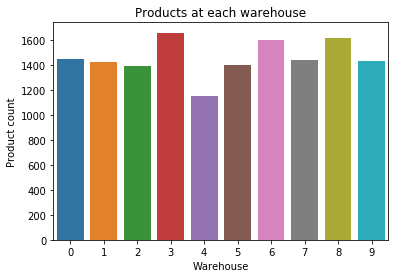

In [70]:
data = df.sum(axis=1).to_frame()
ax = sns.barplot(data = data, x = data.index, y = data[0]) 
ax.set_title("Products at each warehouse")
ax.set_xlabel("Warehouse")
ax.set_ylabel("Product count")
plt.show()

# Show Location

In [111]:
warehouse_location = {}
for i in range(10):
    warehouse_location[i] = [int(i) for i in data_list[4+2*i].split(" ")]
df_wh_coor = pd.DataFrame(warehouse_location).T
df_wh_coor.columns = ["X-C","Y-C"]
df_wh_coor["type"] = "warehouse"

In [112]:
order_location = {}
for i in range(1250) :
    order_location[i] = [int(i) for i in data_list[25+3*i].split(" ")]
df_order_coor = pd.DataFrame(order_location).T
df_order_coor.columns = ["X-C","Y-C"]
df_order_coor["type"] = "order"

In [113]:
plane = pd.concat([df_wh_coor, df_order_coor])

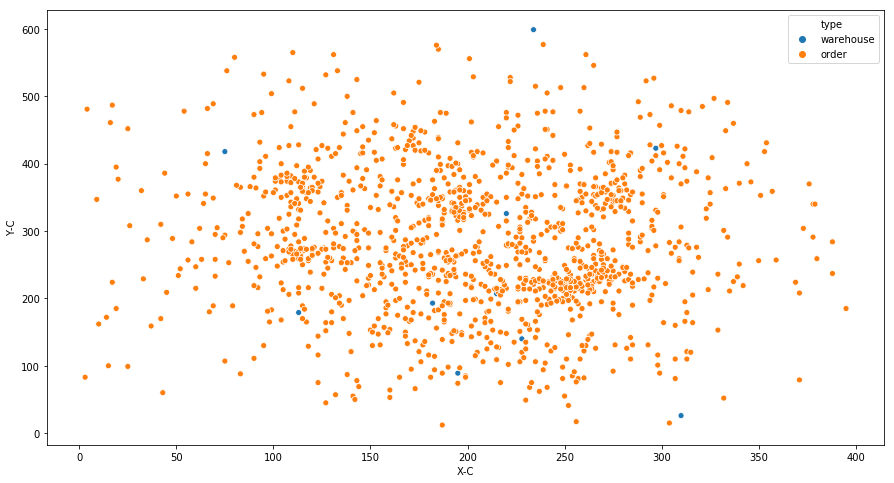

In [114]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = plane["X-C"],y= plane["Y-C"], hue=plane["type"])
plt.show()

# Orders

In [126]:
orders = {}
for i in range(1250):
    orders[i] = [int(i) for i in data_list[27+3*i].split(" ")]



In [127]:
orders

{0: [226, 183, 6, 220, 299, 280, 12, 42],
 1: [163],
 2: [192, 81],
 3: [270, 305, 111, 37, 219, 111, 96, 290, 377, 113],
 4: [169, 146, 397, 263, 342, 275, 18, 26],
 5: [372, 165, 338, 43],
 6: [55, 398, 299, 392, 179, 215],
 7: [49, 76, 205, 364, 55, 388, 219],
 8: [41, 26, 16],
 9: [385, 243, 184, 83, 289],
 10: [300, 272, 298, 367, 10, 121],
 11: [230],
 12: [35, 53, 86, 71, 347, 172, 130, 54, 127, 204, 30, 281],
 13: [66, 26, 200, 398, 355, 375, 296],
 14: [17, 111, 66, 189, 214, 75, 287, 130, 228, 225, 344, 388, 223],
 15: [268, 262, 21, 190, 222, 314, 337, 216],
 16: [203,
  150,
  241,
  307,
  129,
  205,
  160,
  122,
  75,
  305,
  220,
  35,
  54,
  338,
  61,
  391,
  179],
 17: [75, 15, 10, 195],
 18: [344, 397],
 19: [109, 164, 276, 300, 278, 337, 233],
 20: [395, 21, 326, 15, 96, 186, 394, 100, 392, 124, 15, 80, 221],
 21: [84, 211, 199, 186],
 22: [373, 300, 153, 362, 173, 64, 159, 43, 201],
 23: [121, 224, 82, 201, 80, 144, 162, 328, 53, 127, 73, 51, 342],
 24: [114, 

# Optimization

In [115]:
from ortools.graph import pywrapgraph
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [124]:
start_node = np.repeat(np.arange(0,10), 1250).tolist()
end_node = np.tile(np.arange(10,1250), 10).tolist() 